# Desempeño de modelo MedSAM en datasets CT
- Se evaluó el desempeño de segmentación (dice=mean +- std) del modelo MedSAM en los siguientes datasets:
    - kits19-kidney: dice=0.71 +- 0.31
    - task03-liver: dice=0.66 +- 0.3
    - task06-lung: dice=0.76 +- 0.29
    - task07-pancreas: dice=0.72 +- 0.19
    - task10-colon: dice=0.75 +- 0.18
- Los desempeños son bastante buenos, pero caen drásticamente cuando el bounding box es pequeño (es decir, cuando el objeto es pequeño en términos de la cantidad de pixeles anotados). Esto impacta negativamente en el coeficiente Dice promedio. Sin embargo, la mediana del coeficiente de Dice ofrece valores altos en todos los datasets (>0.75), pues los casos de Dice pobres (<0.5) son poco frecuentes.
- BIG WARNING: estos datasets fueron utilizados para entrenar el modelo MedSAM.

In [1]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from pathlib import Path

In [2]:
path_to_performances = {
    "task03-liver": "resources/performance_task03_liver.json",
    "task06-lung": "resources/performance_task06_lung.json",
    "task07-pancreas": "resources/performance_task07_pancreas.json",
    "task10-colon": "resources/performance_task10_colon.json",
    "kits19-kidney": "resources/performance_kits19_kidney.json"
}

In [3]:
performance_df = pd.DataFrame()
for dataset, path in path_to_performances.items():
    with open(path, 'r') as file:
        performance = json.load(file)
    performance = pd.DataFrame(performance)
    performance['dataset'] = dataset
    performance_df = pd.concat([performance_df, performance])
performance_df.reset_index(drop=True, inplace=True)
#performance_df.to_csv('performance_all_datasets.csv')
#performance_df = performance_df[performance_df['annotated_pixels'] >= 5]

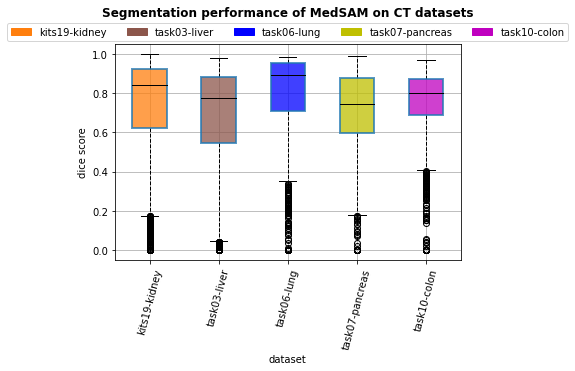

In [4]:
colors = ['tab:orange', 'tab:brown', 'b', 'y', 'm']
boxplot = performance_df.boxplot(
    column='dice_score',
    by='dataset',
    return_type='both',
    patch_artist=True,
    medianprops={'color': 'k', 'linewidth': 1},
    whiskerprops={'linestyle': '--'}
)
for _, (_, row) in boxplot.items():
    for color, box in zip(colors, row['boxes']):
        box.set_facecolor(color)
        box.set_alpha(0.75)
        box.set_linewidth(2)
handles = [mpatches.Patch(color=color) for color in colors]
labels = [item.get_text() for item in plt.gca().get_xticklabels()]
plt.legend(
    handles=handles,
    labels=labels,
    loc='upper center',
    ncol=5,
    bbox_to_anchor=(0.5, 1.12)
)
plt.suptitle('')
plt.title(
    'Segmentation performance of MedSAM on CT datasets',
    x=0.5,
    y=1.1,
    fontweight='bold'
)
plt.ylabel('dice score')
plt.xticks(rotation=75)
plt.savefig('MedSAM_performance_CT_datasets.png', bbox_inches='tight')
plt.show()

In [5]:
performance_df.groupby('dataset').describe()['dice_score']

,count,mean,std,min,25%,50%,75%,max
dataset,,,,,,,,
kits19-kidney,16209.0,0.708849,0.307998,0.0,0.624365,0.842066,0.924643,1.000000
task03-liver,18306.0,0.659818,0.298630,0.0,0.546477,0.775510,0.881656,0.980129
task06-lung,1818.0,0.761044,0.291543,0.0,0.710672,0.892737,0.951360,0.985175
task07-pancreas,2544.0,0.717715,0.186538,0.0,0.597505,0.744719,0.876933,0.989022
task10-colon,1457.0,0.749452,0.181888,0.0,0.686242,0.800661,0.872796,0.970325


In [6]:
##Histogram of annotated pixels on each bounding box, for each dataset
#for dataset in labels:
#    filtered = performance_df[
#        (performance_df['dataset'] == dataset) &
#        (performance_df['annotated_pixels'] < 100)
#    ]
#    _, bins = np.histogram(filtered['annotated_pixels'], bins=100)
#    plt.hist(filtered['annotated_pixels'], bins)
#    plt.show()

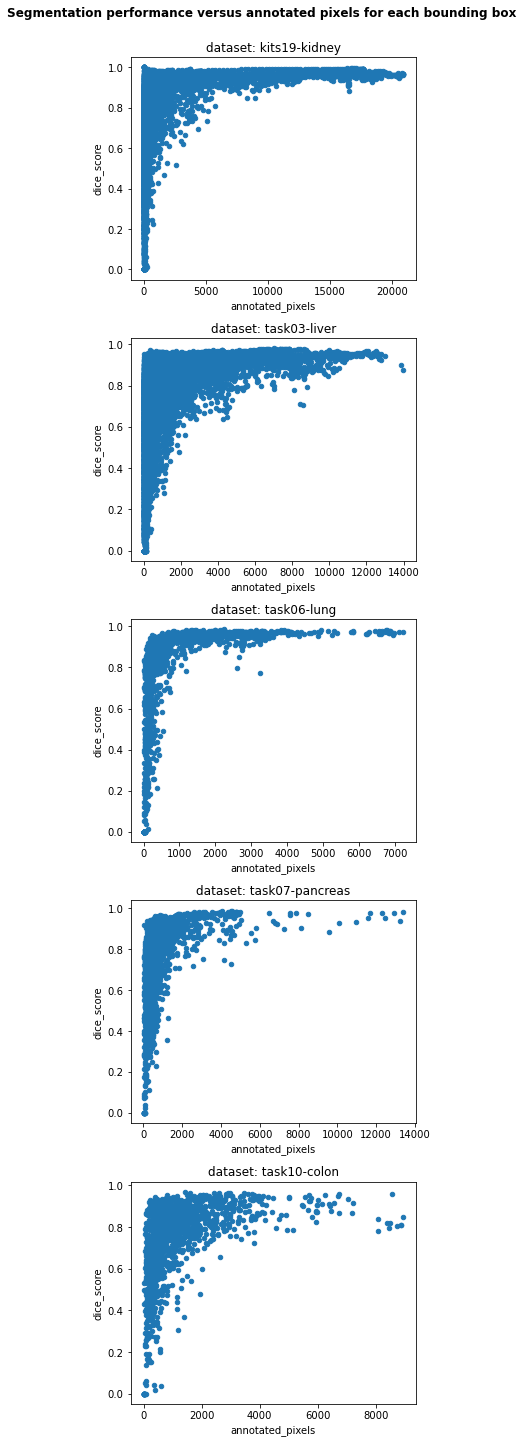

In [7]:
_, ax = plt.subplots(5, 1, figsize=(5, 20))
plt.suptitle(
    "Segmentation performance versus annotated pixels for each bounding box",
    fontweight='bold',
    y=1.0
)
for idx, dataset in enumerate(labels):
    performance_df[performance_df['dataset']==dataset].plot.scatter(
        x='annotated_pixels',
        y='dice_score',
        ax=ax[idx]
    )
    ax[idx].set_title(f"dataset: {dataset}")
plt.tight_layout()
plt.show()